In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing necessary Library

In [2]:
df = pd.read_excel('data_final.xlsx')

#Reading our DataFrame

In [3]:
df.head()

#Displaying the first 5 records

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [4]:
df.isna().sum()

#Since there are no null values no need to drop any column

observation    0
feature        0
price          0
dtype: int64

In [5]:
df.shape

#Our dataset has 100 columns and 3 rows

(100, 3)

In [6]:
df.info()

#All the data are in float format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [7]:
df.describe()


#From this we can obeserve that our data is already in Normalized form from the min and max column. So we dont need to use
# StandardScaler

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


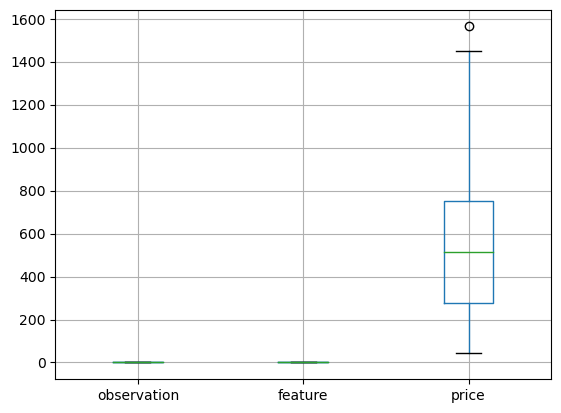

In [8]:
df.boxplot()
plt.show()

#From this box plot we can observe that there are little to 0 outliers in our dataset

C:\Users\Aakash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


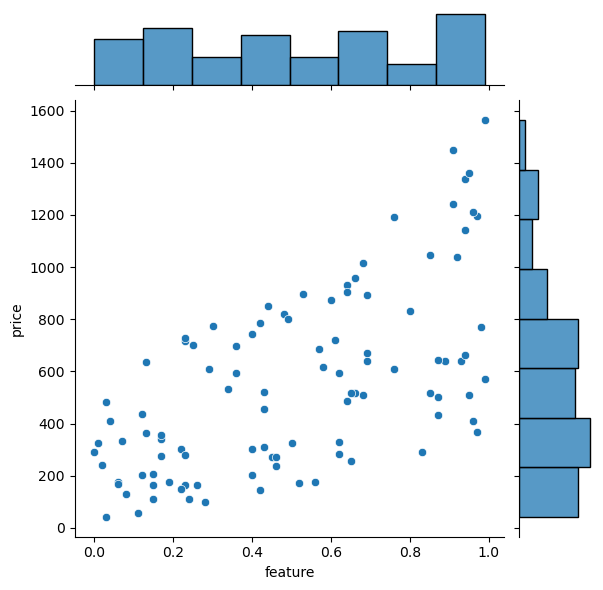

In [9]:
sns.jointplot(df['feature'] , df['price'])
plt.show()

#The feature column here has too much variation in our dataset which can affect our model accuraracy.

C:\Users\Aakash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


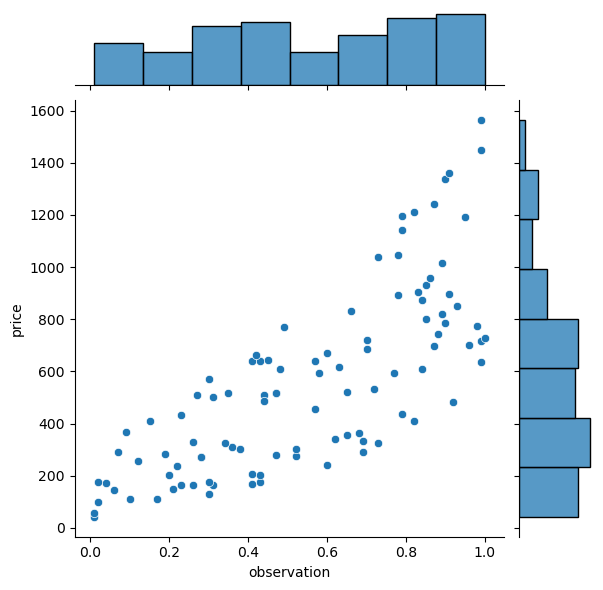

In [10]:
sns.jointplot(df['observation'] , df['price'])
plt.show()

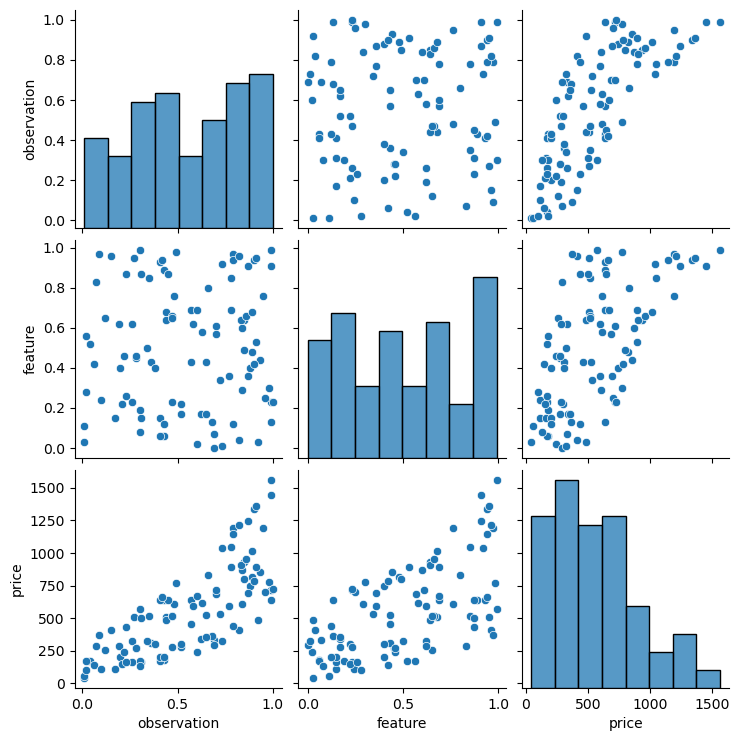

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
#As we can observe from the above graph there is linear relationship between observation and Price, feature and Price
#Since as per the problem statement the data is already normalized we don't have to use standard scaler

In [13]:
x = df.iloc[:,:1].values
y = df.iloc[:,-1].values

# Polynomial Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)

x1 = poly.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x1,y , test_size = 0.2 , random_state = 2)

#Splitting dataset into trainng and testing for passing it into models.

In [16]:
model = LinearRegression()

model.fit(x_train , y_train)

y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import mean_squared_error , r2_score

mean_squared_error(y_test , y_pred)

37608.96024082419

In [18]:
r2_score(y_test , y_pred)
#Cheking the accurary of our model

0.6922924132361628

In [19]:
# Since the dataset is quite small with only 100 rows it is affecting our model accuracy as we got our model accuracy close
# to 70%

# Support Vector Machine

In [87]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 8)

#Creating training and testing dataset

In [88]:
from sklearn.svm import SVR

model = SVR(kernel='poly' , degree = 3)

model.fit(x_train , y_train)

SVR(kernel='poly')

In [89]:
y_pred = model.predict(x_test)

In [90]:
from sklearn.metrics import mean_squared_error , r2_score

mean_squared_error(y_test , y_pred)

37936.30801872818

In [91]:
r2_score(y_test , y_pred)
#Cheking the accurary of our model

0.7112547802043533

In [25]:
#Even with Support Vector Machine which is the best Machine Learning algorithm for various dimensional data
#the accuracy is quite similar which clearly indicates that our dataset is quite small to make an actual predicition.
#In this case both LinearRegression and SVM has the same accuracy of around 70% for predicting house prices.